In [2]:
### Analysis of Ensemble 11 and 12 together (each 216 members)
### Both ensembles are similar to 9 and 10
### Difference are the sampled values of m_l, m_q, µ0, phi and ligphi
### Importantly m_q is fixed and 4 different m_l values are investigated
### And the phi and ligphi values are set to higher values
### The input parameters for the both ensembles are exactly the same except for the conditional stability constant
### Ensemble 11 has beta = 1E9, Ensemble 12 has beta = 1E12
### Time: 10000 years
### Timestep: 0.5 days

In [3]:
### Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl

from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Rectangle

plt.rcParams['text.usetex'] = True

# Enable the use of LaTeX for rendering text labels
mpl.rcParams['text.usetex'] = True

# Set the font family to sans-serif (Helvetica, Arial, etc.)
mpl.rcParams['font.family'] = 'sans-serif'

# Set the font style for the labels (optional)
mpl.rcParams['font.style'] = 'normal'

# Add a LaTeX preamble to change font family for numbers to sans-serif
mpl.rcParams['text.latex.preamble'] = r'\usepackage{sfmath}'


os.getcwd()


'c:\\Users\\konst\\Documents\\_Master_Thesis\\Code\\microCOSM_deep\\Ensemble11_12'

In [4]:
data11 = pd.read_csv('Ensemble11.csv', sep=' ')

In [5]:
data11.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
0,50000.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2121.243562,2351.656354,2393.333530,2393.285984,2402.961310,266.061591,291.176794,597.405006,0.0,224.0
1,50001.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2121.141931,2352.288071,2393.209249,2393.161547,2402.866278,266.065599,291.175437,601.631786,0.0,224.0
2,50002.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2121.124649,2352.394871,2393.188118,2393.140389,2402.850121,266.066227,291.175203,602.350502,0.0,224.0
3,50003.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2124.799336,2333.272264,2397.676834,2397.636583,2405.867438,266.003429,291.228750,488.536263,0.0,224.0
4,50004.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2124.628718,2334.323152,2397.468229,2397.427734,2405.705564,266.007961,291.226353,494.017741,0.0,224.0


In [6]:
data11.shape

(216, 45)

In [7]:
### Add column

data11['fe_lim_p(1)'] = (data11['Fe(1)'] / (data11['Fe(1)'] + data11['kfe_p'] * 1e6)) / (data11['LDOC(1)'] / (data11['LDOC(1)'] + data11['kldoc_p'] * 1e3)) < 1
data11['fe_lim_p(2)'] = (data11['Fe(2)'] / (data11['Fe(2)'] + data11['kfe_p'] * 1e6)) / (data11['LDOC(2)'] / (data11['LDOC(2)'] + data11['kldoc_p'] * 1e3)) < 1
data11['fe_lim_p(3)'] = (data11['Fe(3)'] / (data11['Fe(3)'] + data11['kfe_p'] * 1e6)) / (data11['LDOC(3)'] / (data11['LDOC(3)'] + data11['kldoc_p'] * 1e3)) < 1

In [28]:
data11['beta'] = 1e9

In [8]:
data11.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit,fe_lim_p(1),fe_lim_p(2),fe_lim_p(3)
0,50000.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2393.285984,2402.961310,266.061591,291.176794,597.405006,0.0,224.0,True,True,True
1,50001.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2393.161547,2402.866278,266.065599,291.175437,601.631786,0.0,224.0,True,True,True
2,50002.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2393.140389,2402.850121,266.066227,291.175203,602.350502,0.0,224.0,True,True,True
3,50003.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2397.636583,2405.867438,266.003429,291.228750,488.536263,0.0,224.0,True,True,True
4,50004.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2397.427734,2405.705564,266.007961,291.226353,494.017741,0.0,224.0,True,True,True


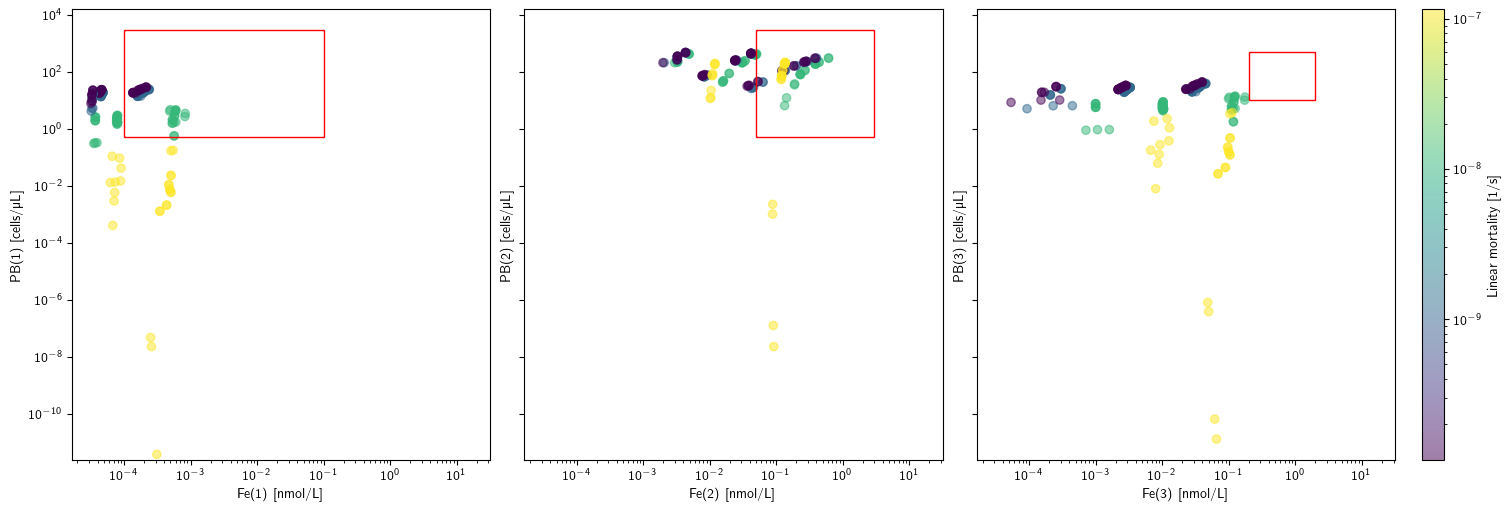

In [45]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Fe(1)'], data11['PB(1)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((1E-4, 0.5), 0.1 - 1E-4, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Fe(2)'], data11['PB(2)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 0.5), 3 - 0.05, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Fe(3)'], data11['PB(3)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Linear mortality [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### All paramter sets are outside the necessary range for the deep ocean
### It is pretty much the mortality that determines the prokaryotic abundance


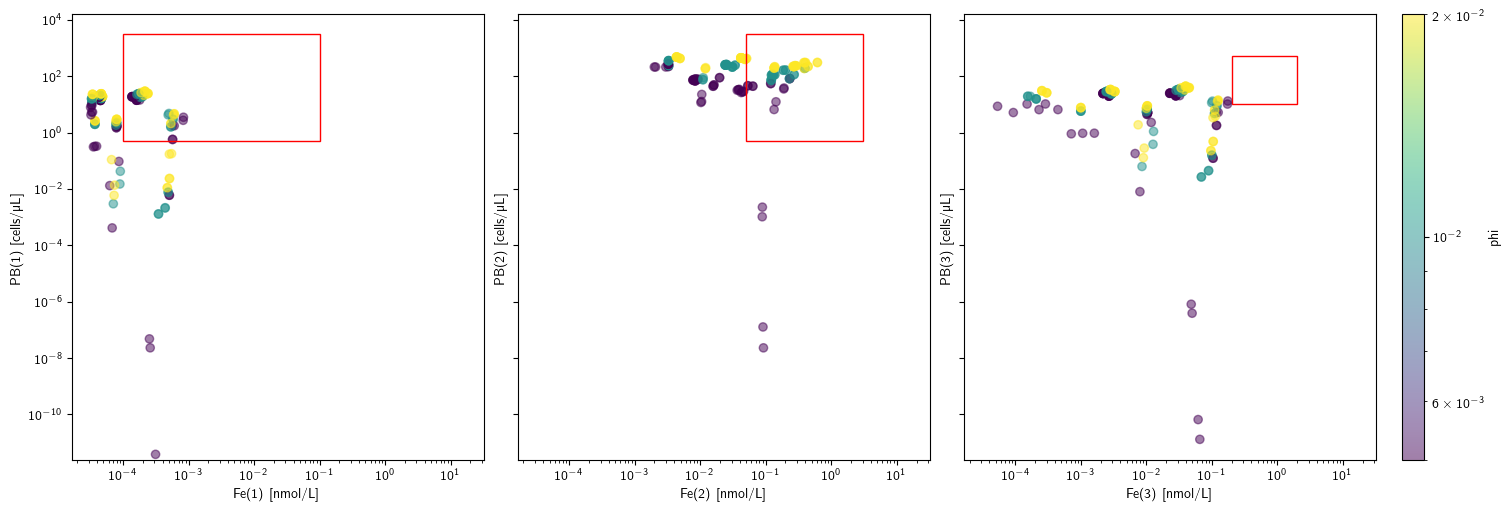

In [59]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Fe(1)'], data11['PB(1)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((1E-4, 0.5), 0.1 - 1E-4, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Fe(2)'], data11['PB(2)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 0.5), 3 - 0.05, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Fe(3)'], data11['PB(3)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Not a single run has enough Fe(3) concentration



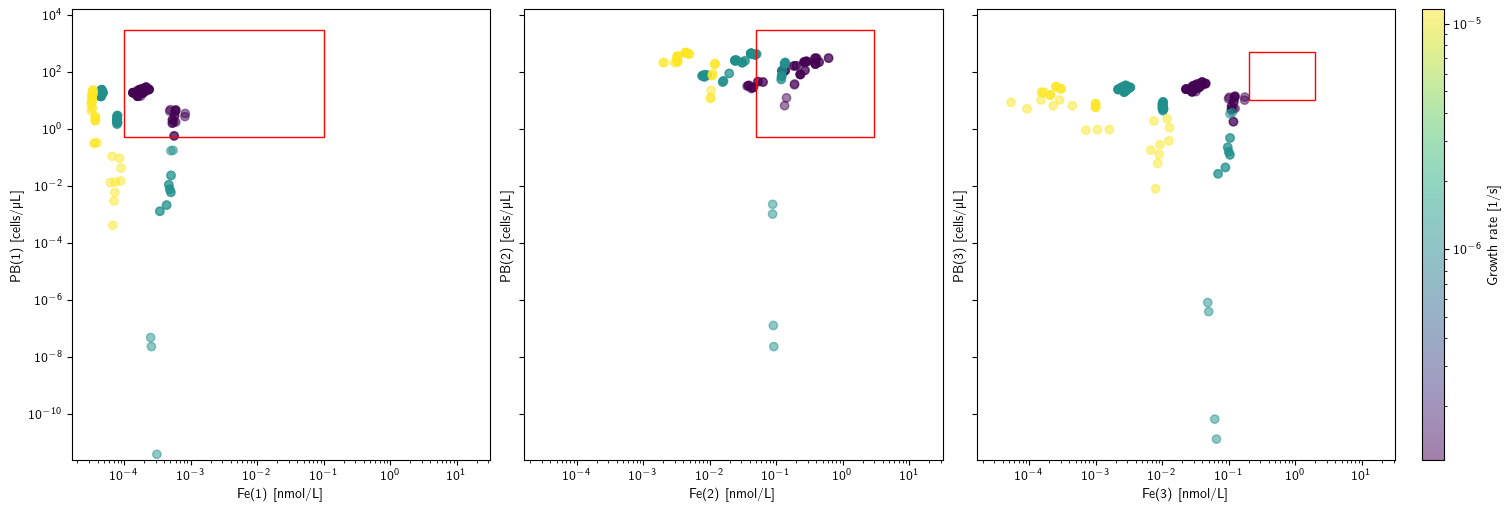

In [54]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Fe(1)'], data11['PB(1)'], c=data11['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((1E-4, 0.5), 0.1 - 1E-4, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Fe(2)'], data11['PB(2)'], c=data11['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 0.5), 3 - 0.05, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Fe(3)'], data11['PB(3)'], c=data11['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Super interesting, low maximum growth rate necessary, otherwise the Fe concentration is too low
### Can be understood by the speed of PB cycling determining the ligand sink
### The faster the cycling of PB, the stronger the ligand sink
### With a lower growth rate it would probably work, getting closer to the limit of no prokaryotes/very slow cycling

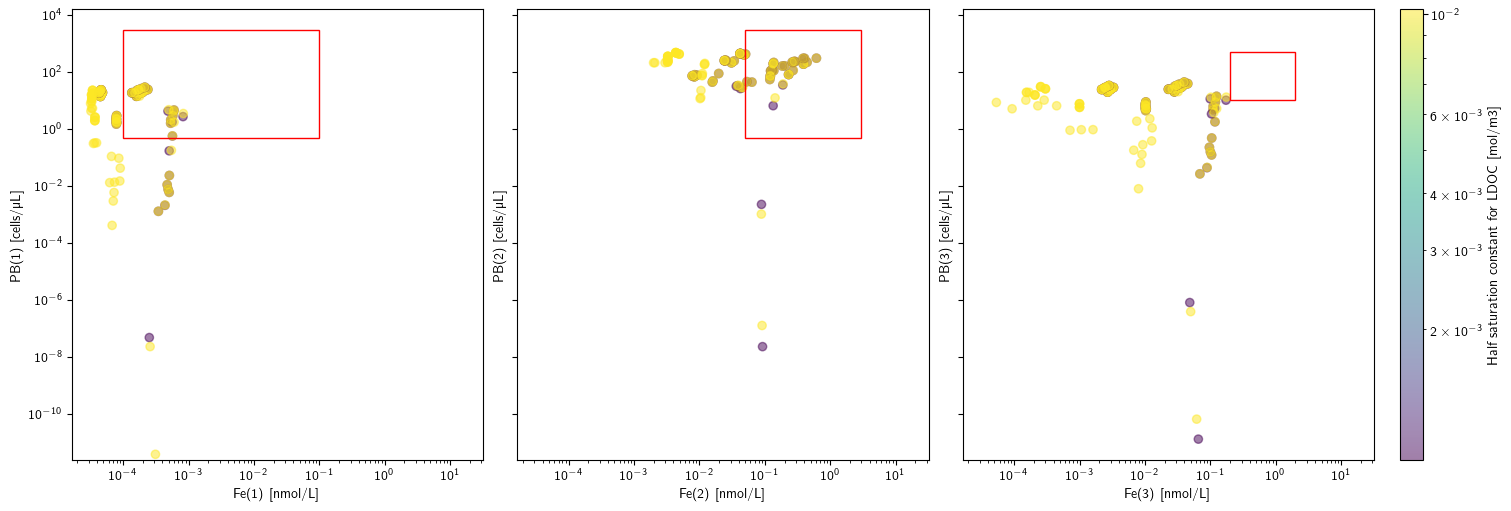

In [53]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Fe(1)'], data11['PB(1)'], c=data11['kldoc_p'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((1E-4, 0.5), 0.1 - 1E-4, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Fe(2)'], data11['PB(2)'], c=data11['kldoc_p'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 0.5), 3 - 0.05, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Fe(3)'], data11['PB(3)'], c=data11['kldoc_p'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Half saturation constant for LDOC [mol/m3]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### K_LDOC does not seem to have any effect here, could be related to limitation regime


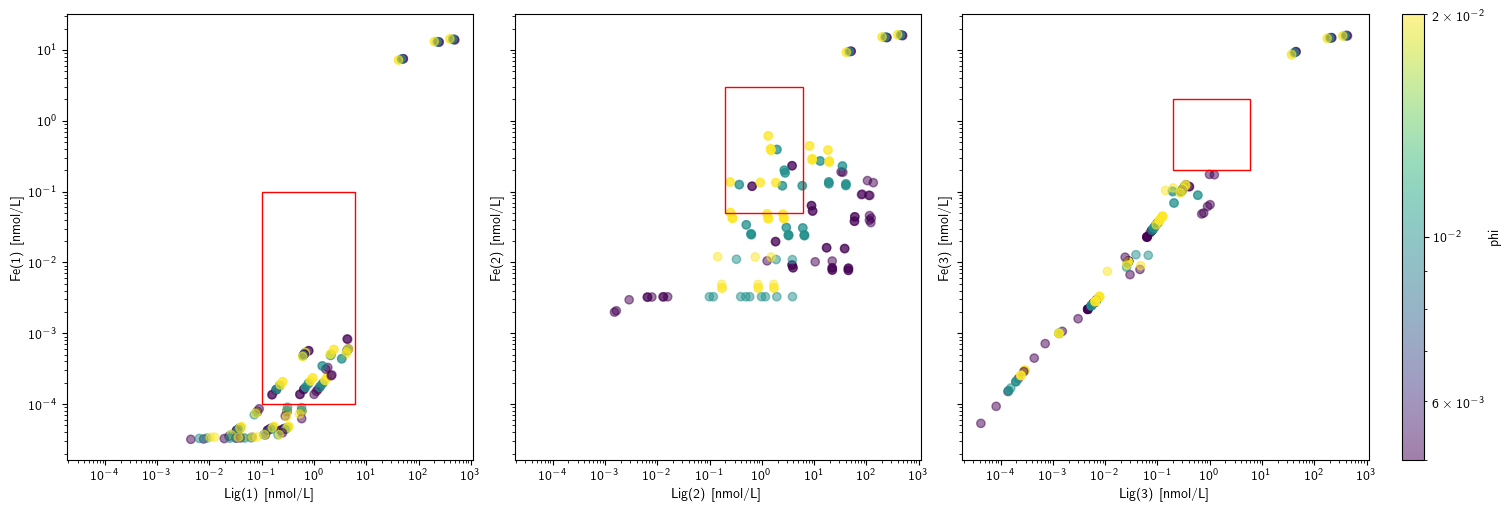

In [52]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs Lig(1)
sc1 = axs[0].scatter(data11['Lig(1)'], data11['Fe(1)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((0.1, 1E-4), 6 - 0.1, 0.1 - 1E-4, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Ligand concentration: limited data LFe: n=7 for GEOTRACES ~[0.3 - 1.2] nmol/kg
### L1Fe and L2Fe do not even have any measurements, so there is too much uncertainty to say anything
### https://doi.org/10.1016/S0967-0637(00)00099-6: 0.72±0.23 nM
### https://doi.org/10.1016/j.dsr2.2011.05.028: 0.5 - 1.5 nM (very specific location, Tasmania, Fe concentrations that were measured were higher)
### https://doi.org/10.3389/fmars.2022.948772: has a table with the results of other studies
### Suggested range: 0.04 - 6.5 nmol eq Fe (units due to measurement protocol)
### Conservative range: 0.1 - 6 nmol/kg

# Scatter plot for Fe(2) vs Lig(2)
sc2 = axs[1].scatter(data11['Lig(2)'], data11['Fe(2)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.2, 0.05), 6 - 0.2, 3 - 0.05, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Ligand concentration estimated from GEOTRACES
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range

# Scatter plot for Fe(3) vs Lig(3)
sc3 = axs[2].scatter(data11['Lig(3)'], data11['Fe(3)'], c=data11['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 0.2), 6 - 0.2, 2 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### A lower phi leads to higher ligand concentrations for the same Fe concentration (for rather high ligand concentrations)
### Not necessarily expected



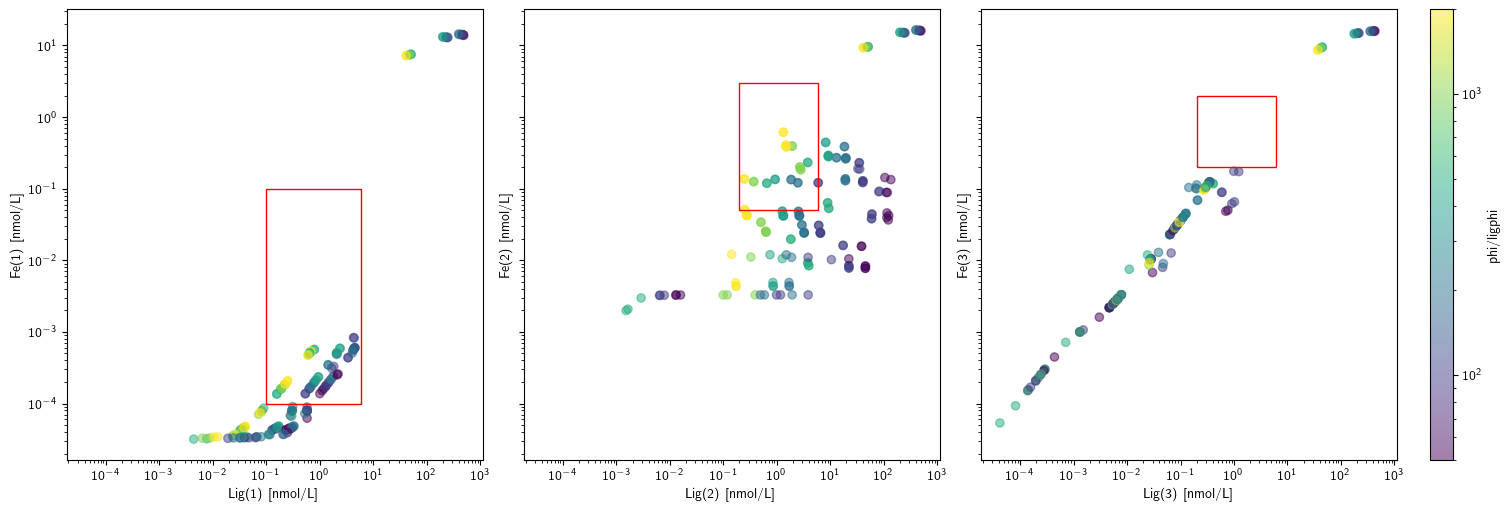

In [56]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs Lig(1)
sc1 = axs[0].scatter(data11['Lig(1)'], data11['Fe(1)'], c=data11['phi']/data11['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((0.1, 1E-4), 6 - 0.1, 0.1 - 1E-4, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Ligand concentration: limited data LFe: n=7 for GEOTRACES ~[0.3 - 1.2] nmol/kg
### L1Fe and L2Fe do not even have any measurements, so there is too much uncertainty to say anything
### https://doi.org/10.1016/S0967-0637(00)00099-6: 0.72±0.23 nM
### https://doi.org/10.1016/j.dsr2.2011.05.028: 0.5 - 1.5 nM (very specific location, Tasmania, Fe concentrations that were measured were higher)
### https://doi.org/10.3389/fmars.2022.948772: has a table with the results of other studies
### Suggested range: 0.04 - 6.5 nmol eq Fe (units due to measurement protocol)
### Conservative range: 0.1 - 6 nmol/kg

# Scatter plot for Fe(2) vs Lig(12)
sc2 = axs[1].scatter(data11['Lig(2)'], data11['Fe(2)'], c=data11['phi']/data11['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.2, 0.05), 6 - 0.2, 3 - 0.05, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Ligand concentration estimated from GEOTRACES
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range


# Scatter plot for Fe(3) vs Lig(3)
sc3 = axs[2].scatter(data11['Lig(3)'], data11['Fe(3)'], c=data11['phi']/data11['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 0.2), 6 - 0.2, 2 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi/ligphi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### @box2: phi/ligphi is allowed to be too small apparently

### It is not the value of phi that determines the ligand to Fe ratio, but rather the phi/ligphi ratio
### In box 1, the different streaks are related to the phi/ligphi ratio
### There seems to be some threshold effect

### Deep ocean is a challenge to get right

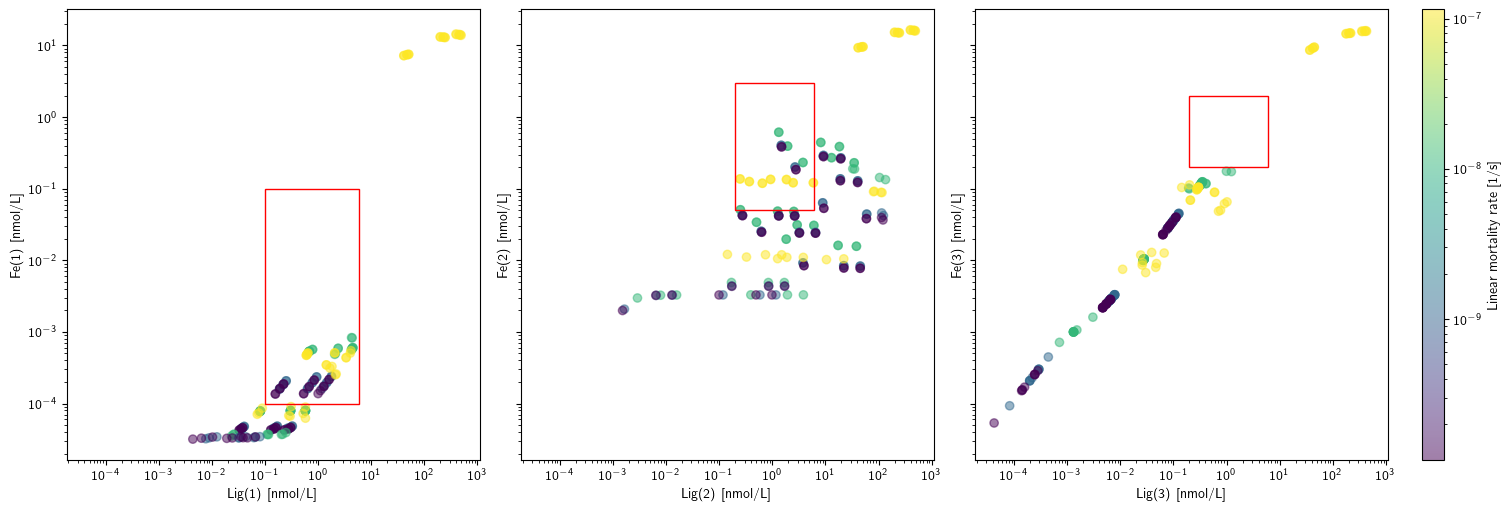

In [57]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Lig(1)'], data11['Fe(1)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((0.1, 1E-4), 6 - 0.1, 0.1 - 1E-4, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Ligand concentration: limited data LFe: n=7 for GEOTRACES ~[0.3 - 1.2] nmol/kg
### L1Fe and L2Fe do not even have any measurements, so there is too much uncertainty to say anything
### https://doi.org/10.1016/S0967-0637(00)00099-6: 0.72±0.23 nM
### https://doi.org/10.1016/j.dsr2.2011.05.028: 0.5 - 1.5 nM (very specific location, Tasmania, Fe concentrations that were measured were higher)
### https://doi.org/10.3389/fmars.2022.948772: has a table with the results of other studies
### Suggested range: 0.04 - 6.5 nmol eq Fe (units due to measurement protocol)
### Conservative range: 0.1 - 6 nmol/kg

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Lig(2)'], data11['Fe(2)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.2, 0.05), 6 - 0.2, 3 - 0.05, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Ligand concentration estimated from GEOTRACES
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Lig(3)'], data11['Fe(3)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 0.2), 6 - 0.2, 2 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Linear mortality rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### A higher linear mortality rate seems leads to high 



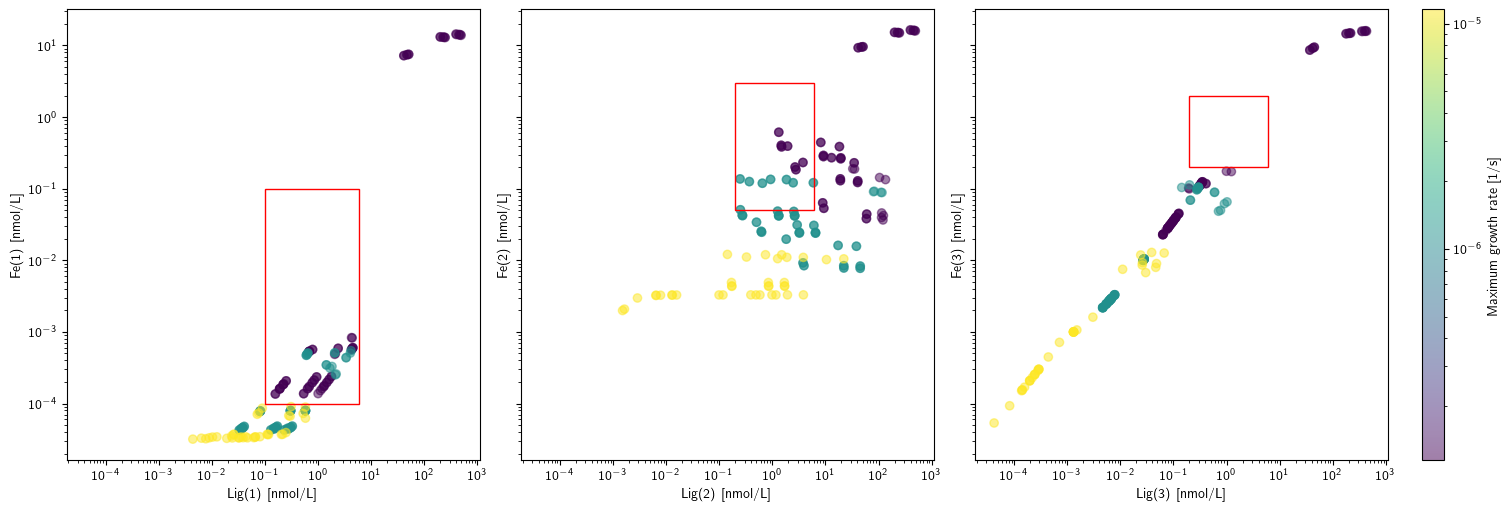

In [60]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11['Lig(1)'], data11['Fe(1)'], c=data11['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((0.1, 1E-4), 6 - 0.1, 0.1 - 1E-4, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Ligand concentration: limited data LFe: n=7 for GEOTRACES ~[0.3 - 1.2] nmol/kg
### L1Fe and L2Fe do not even have any measurements, so there is too much uncertainty to say anything
### https://doi.org/10.1016/S0967-0637(00)00099-6: 0.72±0.23 nM
### https://doi.org/10.1016/j.dsr2.2011.05.028: 0.5 - 1.5 nM (very specific location, Tasmania, Fe concentrations that were measured were higher)
### https://doi.org/10.3389/fmars.2022.948772: has a table with the results of other studies
### Suggested range: 0.04 - 6.5 nmol eq Fe (units due to measurement protocol)
### Conservative range: 0.1 - 6 nmol/kg

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11['Lig(2)'], data11['Fe(2)'], c=data11['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.2, 0.05), 6 - 0.2, 3 - 0.05, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Ligand concentration estimated from GEOTRACES
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11['Lig(3)'], data11['Fe(3)'], c=data11['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 0.2), 6 - 0.2, 2 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Maximum growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()




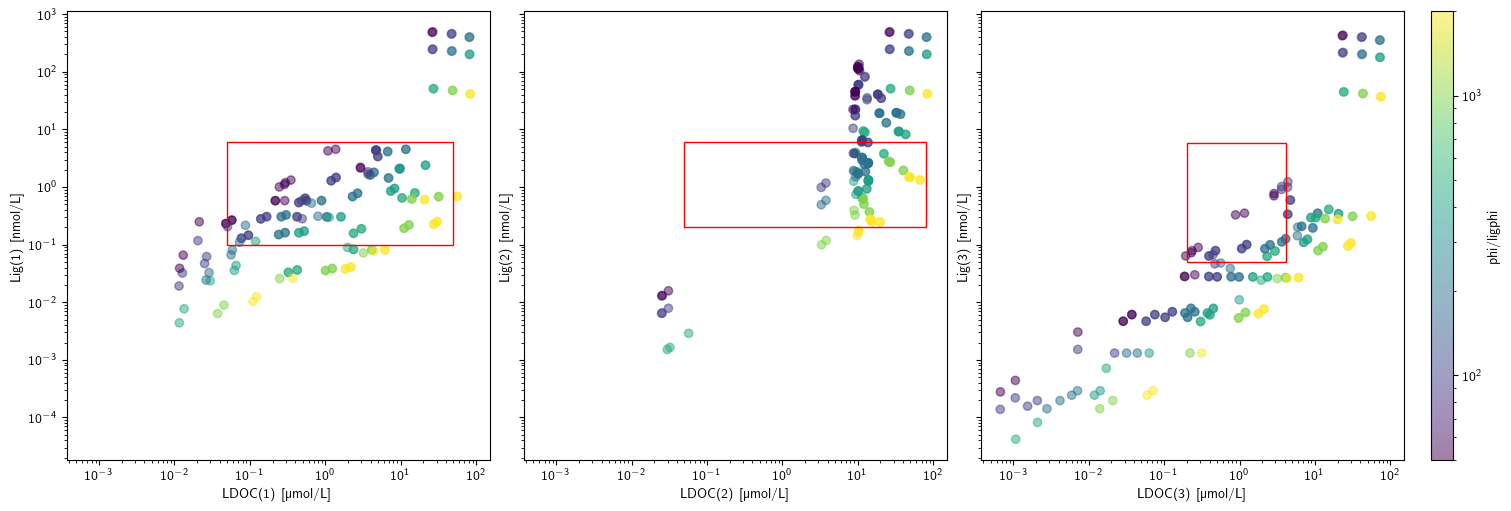

In [13]:
### Ligand vs LDOC scatterplot

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

sc1 = axs[0].scatter(data11['LDOC(1)'], data11['Lig(1)'], c=data11['phi']/data11['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('LDOC(1) [µmol/L]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((0.05, 0.1), 50 - 0.05, 6 - 0.1, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### LDOC must be higher than ligand concentration * rCLig and it must be lower the DOC concentration
### DOC concentrations are not available for the SO in GEOTRACES or in the Hansell data
### Efficient dissolved organic carbon production and export in the oligotrophic ocean: https://doi.org/10.1038/s41467-017-02227-3
###  DOC in the Southern Ocean is lower than ~50 µmol/kg


sc2 = axs[1].scatter(data11['LDOC(2)'], data11['Lig(2)'], c=data11['phi']/data11['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('LDOC(2) [µmol/L]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 0.2), 80 - 0.05, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### DOC concentration in the North Atlantic reaches maximal 80 µmol/kg, LDOC must be lower than that
### Also for the rest of the ocean DOC is rarely higher than 80 µmol/kg (exeption: Mediterranean Sea, Black Sea, Baltic Sea)
### LDOC must be higher than ligand concentration * rCLig ~ 50 nmol/kg (maximal for rCLig = 30)

sc3 = axs[2].scatter(data11['LDOC(3)'], data11['Lig(3)'], c=data11['phi']/data11['ligphi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('LDOC(3) [µmol/L]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 0.05), 4 - 0.05, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)
### DOC in the deep ocean reaches approximately 40 µmol/kg, LDOC must much lower that that
### Set maximum to 4 µmol/kg (~10% of DOC concentration, already very high)

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi/ligphi')

### There is a strong grouping phi/ligphi ratio
### Find values in the correct range
### But for box3 it seems like the phi/ligphi ratio is not allowed to be too high

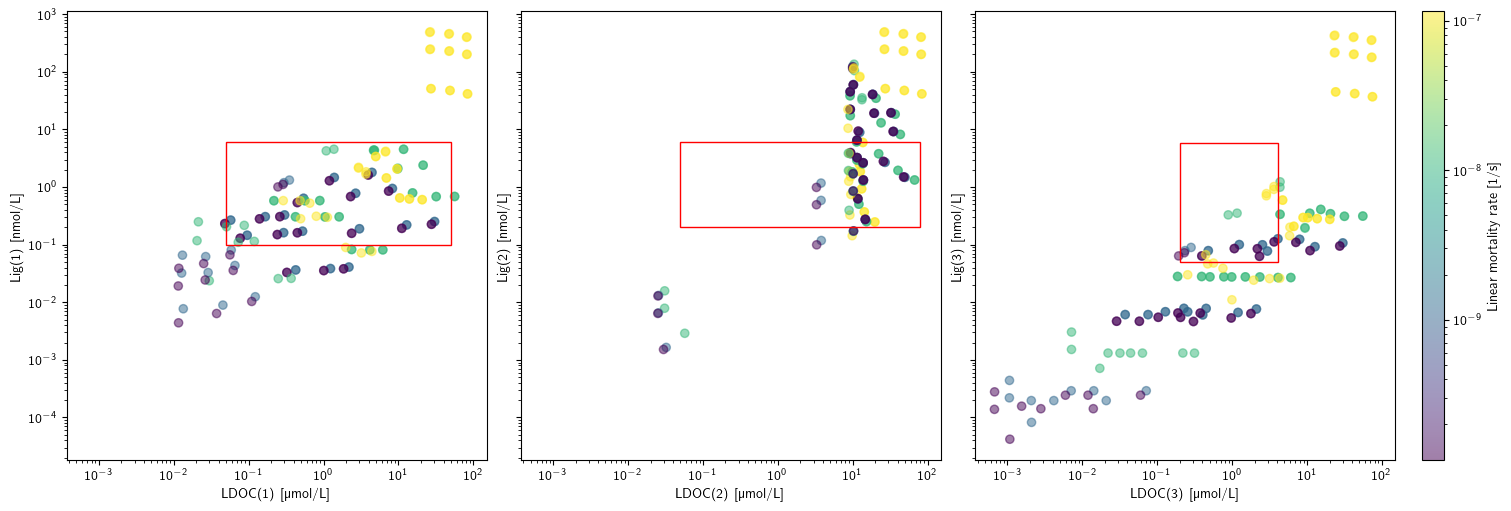

In [14]:
### Ligand vs LDOC scatterplot

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

sc1 = axs[0].scatter(data11['LDOC(1)'], data11['Lig(1)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('LDOC(1) [µmol/L]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((0.05, 0.1), 50 - 0.05, 6 - 0.1, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### LDOC must be higher than ligand concentration * rCLig and it must be lower the DOC concentration
### DOC concentrations are not available for the SO in GEOTRACES or in the Hansell data
### Efficient dissolved organic carbon production and export in the oligotrophic ocean: https://doi.org/10.1038/s41467-017-02227-3
###  DOC in the Southern Ocean is lower than ~50 µmol/kg


sc2 = axs[1].scatter(data11['LDOC(2)'], data11['Lig(2)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('LDOC(2) [µmol/L]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 0.2), 80 - 0.05, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### DOC concentration in the North Atlantic reaches maximal 80 µmol/kg, LDOC must be lower than that
### Also for the rest of the ocean DOC is rarely higher than 80 µmol/kg (exeption: Mediterranean Sea, Black Sea, Baltic Sea)
### LDOC must be higher than ligand concentration * rCLig ~ 50 nmol/kg (maximal for rCLig = 30)

sc3 = axs[2].scatter(data11['LDOC(3)'], data11['Lig(3)'], c=data11['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('LDOC(3) [µmol/L]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 0.05), 4 - 0.05, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)
### DOC in the deep ocean reaches approximately 40 µmol/kg, LDOC must much lower that that
### Set maximum to 4 µmol/kg (~10% of DOC concentration, already very high)

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Linear mortality rate [1/s]')

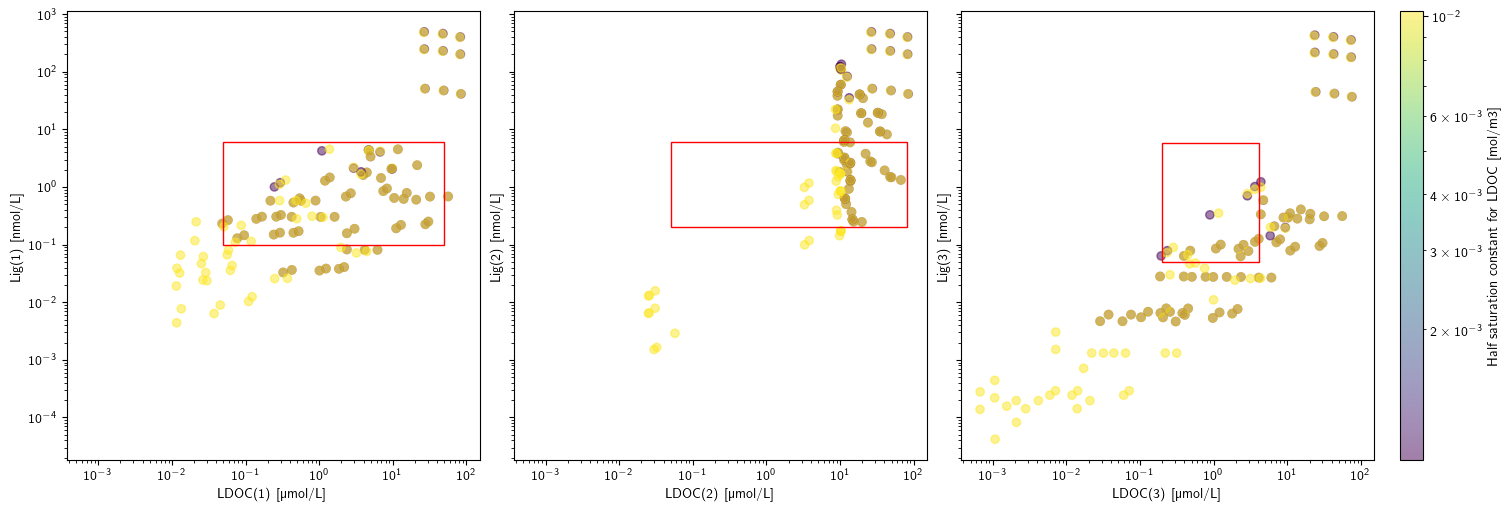

In [15]:
### Ligand vs LDOC scatterplot

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

sc1 = axs[0].scatter(data11['LDOC(1)'], data11['Lig(1)'], c=data11['kldoc_p'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('LDOC(1) [µmol/L]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((0.05, 0.1), 50 - 0.05, 6 - 0.1, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### LDOC must be higher than ligand concentration * rCLig and it must be lower the DOC concentration
### DOC concentrations are not available for the SO in GEOTRACES or in the Hansell data
### Efficient dissolved organic carbon production and export in the oligotrophic ocean: https://doi.org/10.1038/s41467-017-02227-3
###  DOC in the Southern Ocean is lower than ~50 µmol/kg


sc2 = axs[1].scatter(data11['LDOC(2)'], data11['Lig(2)'], c=data11['kldoc_p'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('LDOC(2) [µmol/L]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 0.2), 80 - 0.05, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### DOC concentration in the North Atlantic reaches maximal 80 µmol/kg, LDOC must be lower than that
### Also for the rest of the ocean DOC is rarely higher than 80 µmol/kg (exeption: Mediterranean Sea, Black Sea, Baltic Sea)
### LDOC must be higher than ligand concentration * rCLig ~ 50 nmol/kg (maximal for rCLig = 30)

sc3 = axs[2].scatter(data11['LDOC(3)'], data11['Lig(3)'], c=data11['kldoc_p'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('LDOC(3) [µmol/L]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 0.05), 4 - 0.05, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)
### DOC in the deep ocean reaches approximately 40 µmol/kg, LDOC must much lower that that
### Set maximum to 4 µmol/kg (~10% of DOC concentration, already very high)

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Half saturation constant for LDOC [mol/m3]')

In [17]:
data11['kfe_p'].unique()

array([1.0245e-06])

# Ensemble 12

In [18]:
data12 = pd.read_csv('Ensemble12.csv', sep=' ')

In [20]:
data12.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
0,51000.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2121.097978,2352.559556,2393.155507,2393.107737,2402.825185,266.067186,291.174842,603.460928,0.0,224.0
1,51001.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2121.095075,2352.577388,2393.151959,2393.104184,2402.822471,266.067283,291.174802,603.581394,0.0,224.0
2,51002.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2121.092894,2352.590774,2393.149292,2393.101514,2402.820432,266.067354,291.174772,603.671855,0.0,224.0
3,51003.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2124.554462,2334.778855,2397.377448,2397.336846,2405.635119,266.009793,291.225301,496.420872,0.0,224.0
4,51004.0,43200.0,10000.0,0.00004,1.157407e-07,1.157407e-07,0.0,1.0,0.000001,0.001025,...,2124.549782,2334.807509,2397.371727,2397.331119,2405.630680,266.009903,291.225234,496.572532,0.0,224.0


In [21]:
data12.shape

(216, 45)

In [22]:
### Add column

data12['fe_lim_p(1)'] = (data12['Fe(1)'] / (data12['Fe(1)'] + data12['kfe_p'] * 1e6)) / (data12['LDOC(1)'] / (data12['LDOC(1)'] + data12['kldoc_p'] * 1e3)) < 1
data12['fe_lim_p(2)'] = (data12['Fe(2)'] / (data12['Fe(2)'] + data12['kfe_p'] * 1e6)) / (data12['LDOC(2)'] / (data12['LDOC(2)'] + data12['kldoc_p'] * 1e3)) < 1
data12['fe_lim_p(3)'] = (data12['Fe(3)'] / (data12['Fe(3)'] + data12['kfe_p'] * 1e6)) / (data12['LDOC(3)'] / (data12['LDOC(3)'] + data12['kldoc_p'] * 1e3)) < 1

In [29]:
data12['beta'] = 1E12

In [23]:
data12.shape

(216, 48)

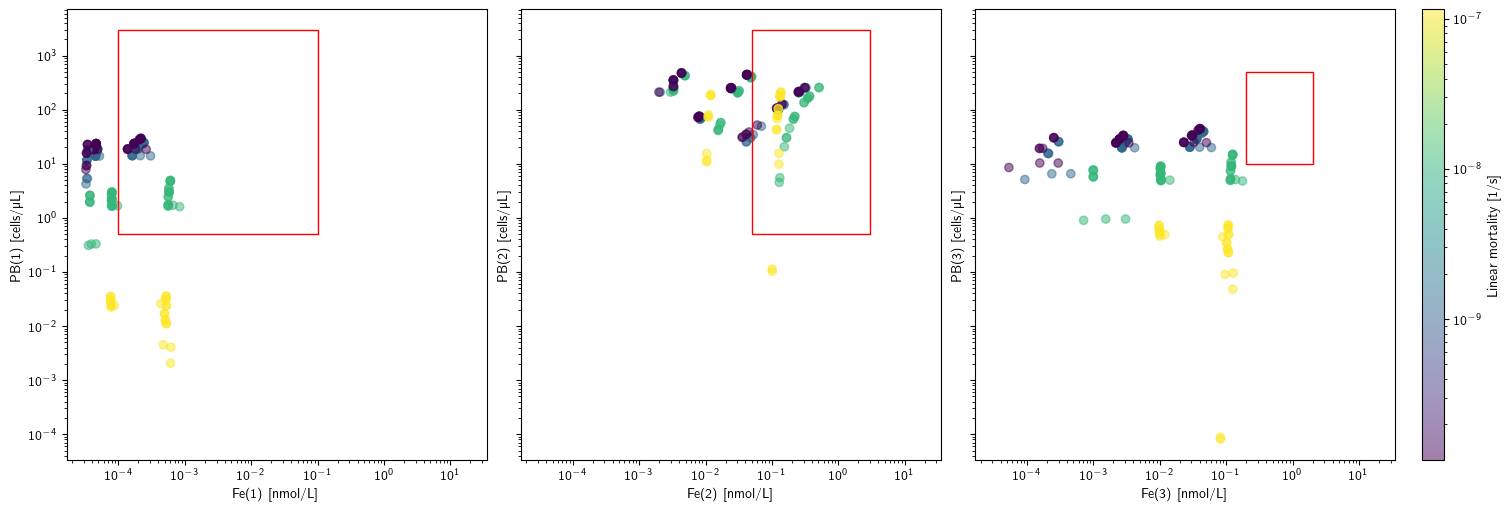

In [24]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data12['Fe(1)'], data12['PB(1)'], c=data12['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((1E-4, 0.5), 0.1 - 1E-4, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data12['Fe(2)'], data12['PB(2)'], c=data12['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 0.5), 3 - 0.05, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data12['Fe(3)'], data12['PB(3)'], c=data12['m_l'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Linear mortality [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### All paramter sets are outside the necessary range for the deep ocean, ***even for beta = 1E12***
### It is pretty much the mortality that determines the prokaryotic abundance


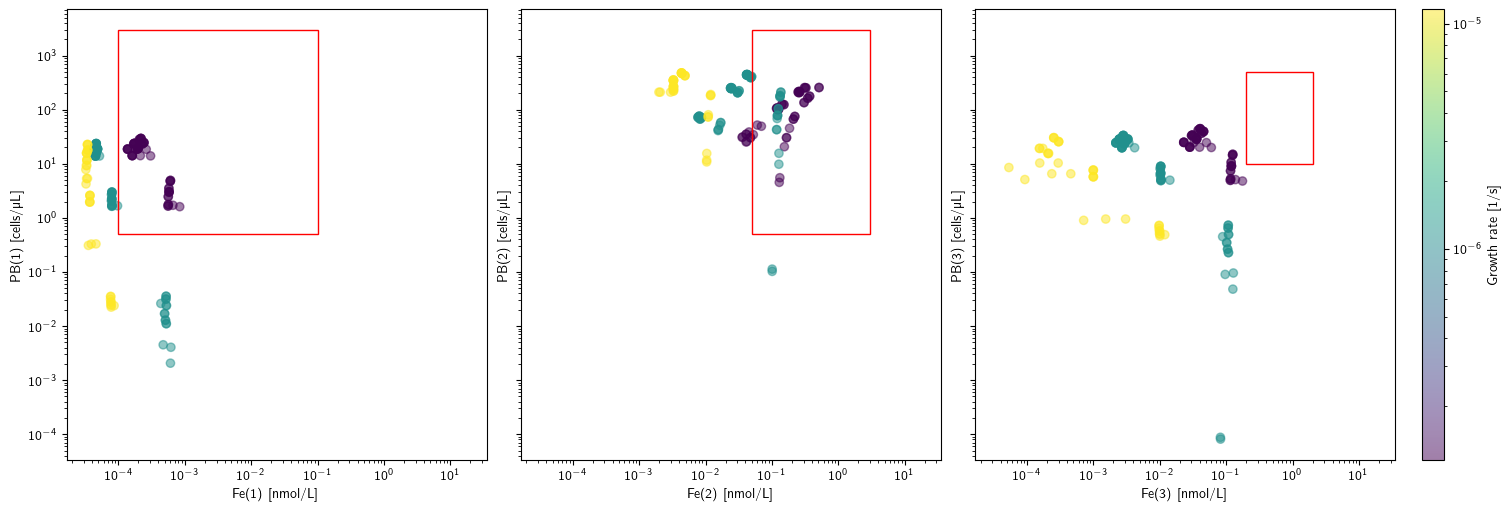

In [25]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data12['Fe(1)'], data12['PB(1)'], c=data12['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((1E-4, 0.5), 0.1 - 1E-4, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data12['Fe(2)'], data12['PB(2)'], c=data12['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 0.5), 3 - 0.05, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data12['Fe(3)'], data12['PB(3)'], c=data12['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Super interesting, low maximum growth rate necessary, otherwise the Fe concentration is too low
### Can be understood by the speed of PB cycling determining the ligand sink
### The faster the cycling of PB, the stronger the ligand sink
### With a lower growth rate it would probably work, getting closer to the limit of no prokaryotes/very slow cycling

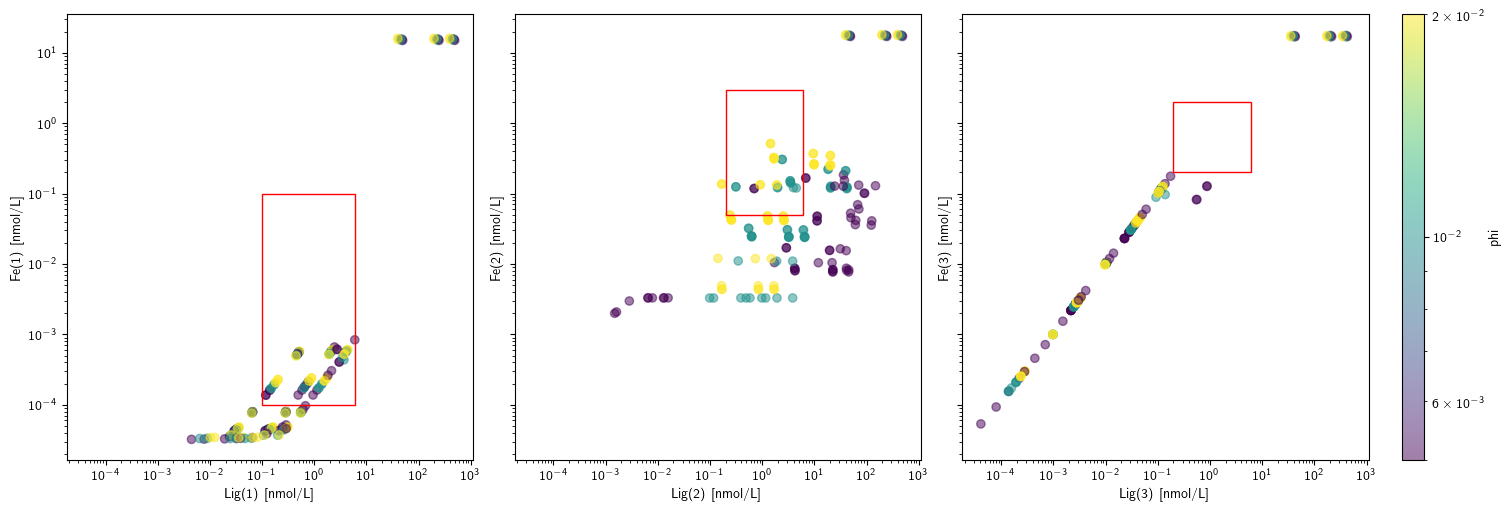

In [26]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs Lig(1)
sc1 = axs[0].scatter(data12['Lig(1)'], data12['Fe(1)'], c=data12['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((0.1, 1E-4), 6 - 0.1, 0.1 - 1E-4, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Ligand concentration: limited data LFe: n=7 for GEOTRACES ~[0.3 - 1.2] nmol/kg
### L1Fe and L2Fe do not even have any measurements, so there is too much uncertainty to say anything
### https://doi.org/10.1016/S0967-0637(00)00099-6: 0.72±0.23 nM
### https://doi.org/10.1016/j.dsr2.2011.05.028: 0.5 - 1.5 nM (very specific location, Tasmania, Fe concentrations that were measured were higher)
### https://doi.org/10.3389/fmars.2022.948772: has a table with the results of other studies
### Suggested range: 0.04 - 6.5 nmol eq Fe (units due to measurement protocol)
### Conservative range: 0.1 - 6 nmol/kg

# Scatter plot for Fe(2) vs Lig(2)
sc2 = axs[1].scatter(data12['Lig(2)'], data12['Fe(2)'], c=data12['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.2, 0.05), 6 - 0.2, 3 - 0.05, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Ligand concentration estimated from GEOTRACES
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range

# Scatter plot for Fe(3) vs Lig(3)
sc3 = axs[2].scatter(data12['Lig(3)'], data12['Fe(3)'], c=data12['phi'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 0.2), 6 - 0.2, 2 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('phi')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### A lower phi leads to higher ligand concentrations for the same Fe concentration (for rather high ligand concentrations)
### Not necessarily expected



# Both ensembles in comparison

In [30]:
data11_12 = pd.concat([data11, data12], ignore_index=True)

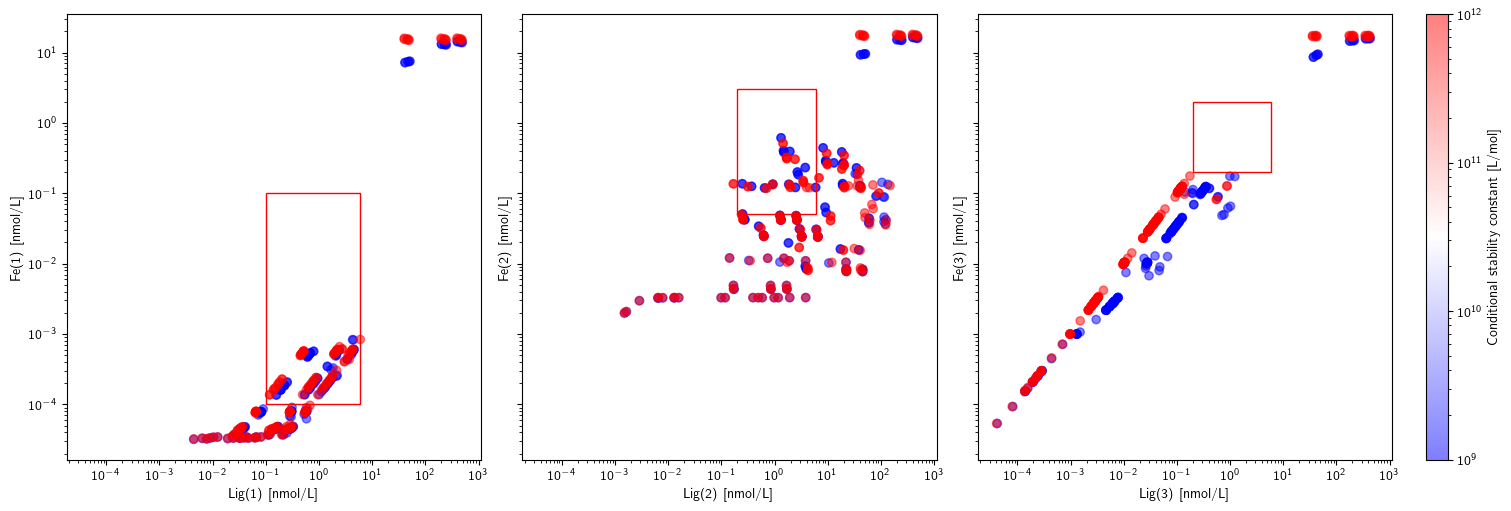

In [33]:
### Scatterplot of Fe(3) vs Lig(3)


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs Lig(1)
sc1 = axs[0].scatter(data11_12['Lig(1)'], data11_12['Fe(1)'], c=data11_12['beta'], cmap='bwr', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Lig(1) [nmol/L]')
axs[0].set_ylabel('Fe(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((0.1, 1E-4), 6 - 0.1, 0.1 - 1E-4, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Ligand concentration: limited data LFe: n=7 for GEOTRACES ~[0.3 - 1.2] nmol/kg
### L1Fe and L2Fe do not even have any measurements, so there is too much uncertainty to say anything
### https://doi.org/10.1016/S0967-0637(00)00099-6: 0.72±0.23 nM
### https://doi.org/10.1016/j.dsr2.2011.05.028: 0.5 - 1.5 nM (very specific location, Tasmania, Fe concentrations that were measured were higher)
### https://doi.org/10.3389/fmars.2022.948772: has a table with the results of other studies
### Suggested range: 0.04 - 6.5 nmol eq Fe (units due to measurement protocol)
### Conservative range: 0.1 - 6 nmol/kg

# Scatter plot for Fe(2) vs Lig(2)
sc2 = axs[1].scatter(data11_12['Lig(2)'], data11_12['Fe(2)'], c=data11_12['beta'], cmap='bwr', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Lig(2) [nmol/L]')
axs[1].set_ylabel('Fe(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.2, 0.05), 6 - 0.2, 3 - 0.05, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Ligand concentration estimated from GEOTRACES
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range

# Scatter plot for Fe(3) vs Lig(3)
sc3 = axs[2].scatter(data11_12['Lig(3)'], data11_12['Fe(3)'], c=data11_12['beta'], cmap='bwr', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Lig(3) [nmol/L]')
axs[2].set_ylabel('Fe(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 0.2), 6 - 0.2, 2 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Conditional stability constant [L/mol]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### A change in beta does not really change the outcome/ interpretation of the plot



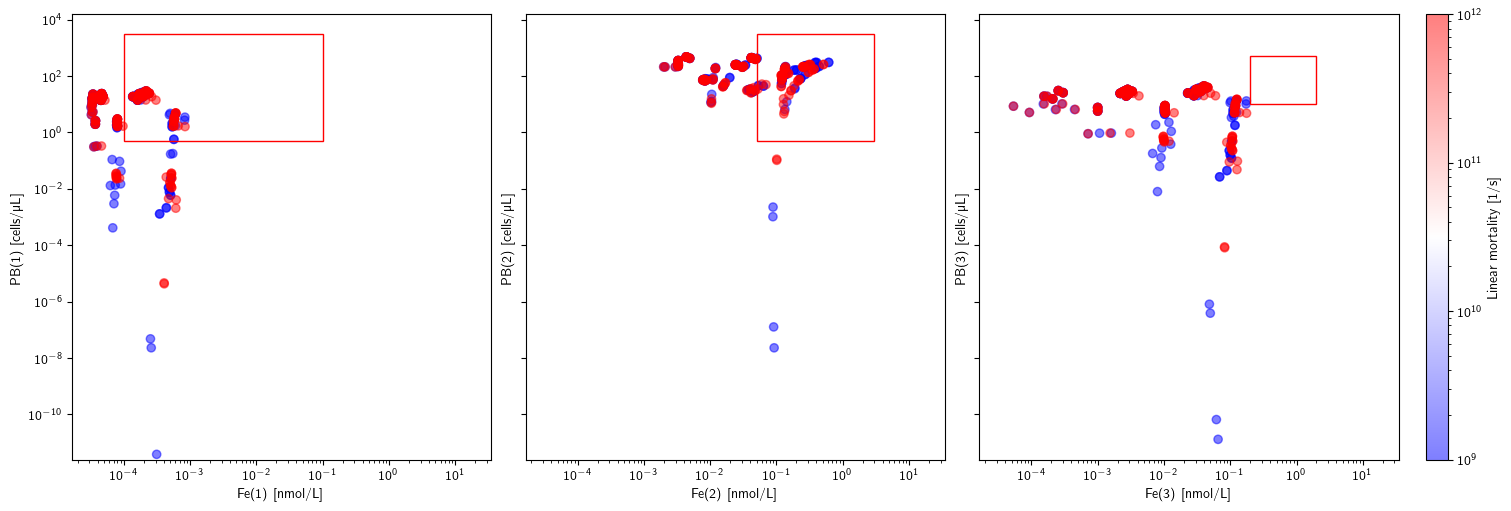

In [35]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data11_12['Fe(1)'], data11_12['PB(1)'], c=data11_12['beta'], cmap='bwr', marker='o', alpha=0.5, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
rect = Rectangle((1E-4, 0.5), 0.1 - 1E-4, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data11_12['Fe(2)'], data11_12['PB(2)'], c=data11_12['beta'], cmap='bwr', marker='o', alpha=0.5, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 0.5), 3 - 0.05, 3000 - 0.5, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data11_12['Fe(3)'], data11_12['PB(3)'], c=data11_12['beta'], cmap='bwr', marker='o', alpha=0.5, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Linear mortality [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### All paramter sets are outside the necessary range for the deep ocean, ***even for beta = 1E12***
### No big difference between beta = 1E12 and beta = 1E9

